**Importing Libraries**

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import keras
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [ ]:
df=pd.read_csv('drive/MyDrive/dataset.csv')
df=df.drop("length", axis='columns')
df.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Encoding Labels**

In [ ]:
encoder=LabelEncoder()
genre_list=df.iloc[:, -1]
y=encoder.fit_transform(genre_list)
df=df.drop(['filename'], axis=1)

**Scaling Features**

In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:,:-1], dtype=float))
print(X.shape)

(1000, 57)


**Spliting Dataset**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_val=X_train[:100]
X_train=X_train[100:]
y_val=y_train[:100]
y_train=y_train[100:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(700, 57) (700,) (200, 57) (200,) (100, 57) (100,)


**Building Model**

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_history_adam=model.fit(X_train,y_train,epochs=200,batch_size=256, validation_data=(X_val,y_val))

Epoch 1/200
3/3 [==============================] - 4s 256ms/step - loss: 2.3169 - accuracy: 0.1414 - val_loss: 2.1094 - val_accuracy: 0.2100
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 2.0489 - accuracy: 0.2914 - val_loss: 1.9598 - val_accuracy: 0.4100
Epoch 3/200
3/3 [==============================] - 0s 40ms/step - loss: 1.8504 - accuracy: 0.3914 - val_loss: 1.8156 - val_accuracy: 0.4400
Epoch 4/200
3/3 [==============================] - 0s 47ms/step - loss: 1.6720 - accuracy: 0.4471 - val_loss: 1.6717 - val_accuracy: 0.4400
Epoch 5/200
3/3 [==============================] - 0s 58ms/step - loss: 1.4941 - accuracy: 0.4929 - val_loss: 1.5033 - val_accuracy: 0.5200
Epoch 6/200
3/3 [==============================] - 0s 54ms/step - loss: 1.3207 - accuracy: 0.5757 - val_loss: 1.3619 - val_accuracy: 0.5400
Epoch 7/200
3/3 [==============================] - 0s 52ms/step - loss: 1.1723 - accuracy: 0.6243 - val_loss: 1.2663 - val_accuracy: 0.5700
Epoch 8/200
3/3 [==

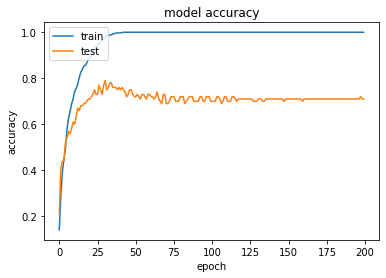

In [ ]:
plt.plot(model_history_adam.history['accuracy'])
plt.plot(model_history_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Testing model**

In [ ]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc, "\ntest_loss:",test_loss)

7/7 [==============================] - 0s 3ms/step - loss: 1.7324 - accuracy: 0.7200
Test accuracy: 0.7200000286102295 
test_loss: 1.732445240020752


**Saving model**

In [ ]:
from google.colab import files
model.save('classifico.h5')
files.download('classifico.h5')

NameError: ignored

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import load_model
mod = load_model('/content/classifico.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 56,650
Trainable params: 56,650
Non-trainable params: 0
_________________________________________________________________
